In [1]:
df = pd.read_csv(r'C:\Users\handa\Desktop\Datasets\Real Estate INDIA\Real_Estate.csv')

<IPython.core.display.Javascript object>

In [2]:
dff = df.drop(['Name','Price in rupee','Gross Price',
         'Location', 'Area',
       'Description'],axis = 1)

In [3]:
dff['Price'] = dff['Price']/100000
dff.columns

Index(['Type', 'BHK', 'Price', 'State', 'Total_Area', 'Price_per_SQFT',
       'Baths', 'Balcony'],
      dtype='object')

In [4]:
dff['BHK'] = dff['BHK'].str.replace('+','')
dff['BHK'].unique()

C:\Users\handa\AppData\Local\Temp\ipykernel_18456\3710437665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dff['BHK'] = dff['BHK'].str.replace('+','')


array(['4 BHK', '10 BHK', '3 BHK', '7 BHK', '2 BHK', '1 BHK', '6 BHK',
       '5 BHK', '1 RK', '8 BHK', '1.5 BHK', '2.5 BHK', '9 BHK', '3.5 BHK',
       '0', '6 RK', '10.5 BHK', '4.5 BHK', '9.5 BHK', '8.5 BHK',
       '7.5 BHK', '5 RK', '1 R', '2 RK', '3 RK', '4 RK', '2 BH', '3 R'],
      dtype=object)

In [5]:
bhk = []
bh = []
rk = []
r = []
for i in dff['BHK']:
    if len(i.split(' ')) > 1:
        if i.split(' ')[1] == 'BHK':    # if i[1] == BHK
            bhk.append(float(i.split(' ')[0]))
            bh.append(0)
            rk.append(0)
            r.append(0)
        if i.split(' ')[1] == 'BH':     # if i[1] == BH
            bhk.append(0)
            bh.append(float(i.split(' ')[0]))
            rk.append(0)
            r.append(0)
        if i.split(' ')[1] == 'RK':     # if i[1] == RK
            bhk.append(0)
            bh.append(0)
            rk.append(float(i.split(' ')[0]))
            r.append(0)
        if i.split(' ')[1] == 'R':     # if i[1] == R
            bhk.append(0)
            bh.append(0)
            rk.append(0)
            r.append(float(i.split(' ')[0]))
    else:
        bhk.append(0)
        bh.append(0)
        rk.append(0)
        r.append(0)

In [6]:
BHK = pd.Series(bhk) 
BH = pd.Series(bh)
RK = pd.Series(rk)
R = pd.Series(r)
d = pd.concat([BHK,BH,RK,R],axis = 1)
d.rename(columns = ({0:'BHK',1:'BH',2:'RK',3:'R'}), inplace = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
df1 = pd.concat([dff.drop('BHK',axis = 1),d],axis = 1)
df1

<IPython.core.display.Javascript object>

,Type,Price,State,Total_Area,Price_per_SQFT,Baths,Balcony,BHK,BH,RK,R
0,Flat,199.0,Chennai,2583,7704.22,4,1,4.0,0.0,0.0,0.0
1,Independent House,225.0,Chennai,7000,3214.29,6,1,10.0,0.0,0.0,0.0
2,Flat,100.0,Chennai,1320,7575.76,3,0,3.0,0.0,0.0,0.0
3,Independent House,333.0,Chennai,4250,7835.29,5,1,7.0,0.0,0.0,0.0
4,Flat,48.0,Chennai,960,5000.00,3,1,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14523,Flat,40.0,New Delhi,1053,3798.67,3,1,2.0,0.0,0.0,0.0
14524,Independent House,14.0,New Delhi,472,2966.10,2,1,1.0,0.0,0.0,0.0
14525,Flat,30.0,New Delhi,378,7936.51,1,1,1.0,0.0,0.0,0.0
14526,Flat,60.0,New Delhi,700,8571.43,2,1,3.0,0.0,0.0,0.0


# Outliers

In [8]:
def out_check(data , lst):
    t = data[lst]
    # IQR = Q3 – Q1
    iqr = t.quantile(0.75) - t.quantile(0.25)

    # upper fence = Q3 + (1.5 * IQR)
    uf = t.quantile(0.75) + 1.5 * iqr

    # lower fence = Q1 – (1.5 * IQR)
    lf = t.quantile(0.25) - 1.5 * iqr
    lf , uf
    # Use your fences to highlight any outliers, all values that fall outside your fences. 
    return t[(t<lf) | (t>uf)].count()/len(t)*100

In [9]:
def box_plot(data,lst):
    plt.figure(figsize =(25,15))
    for i in range(len(lst)):
        plt.subplot(4,3,i+1)
        sns.boxplot(x = data[lst[i]])
    #     plt.hist(data[lst[i]], rwidth = 0.7)

In [10]:
l = ['Price', 'Total_Area', 'Price_per_SQFT', 'Baths',
       'Balcony', 'BHK', 'BH', 'RK', 'R']
out_check(df1 , l)

Price              8.893172
Total_Area         7.998348
Price_per_SQFT     9.381883
Baths              4.281388
Balcony            0.000000
BHK               14.062500
BH                 0.027533
RK                 4.859581
R                  0.034416
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

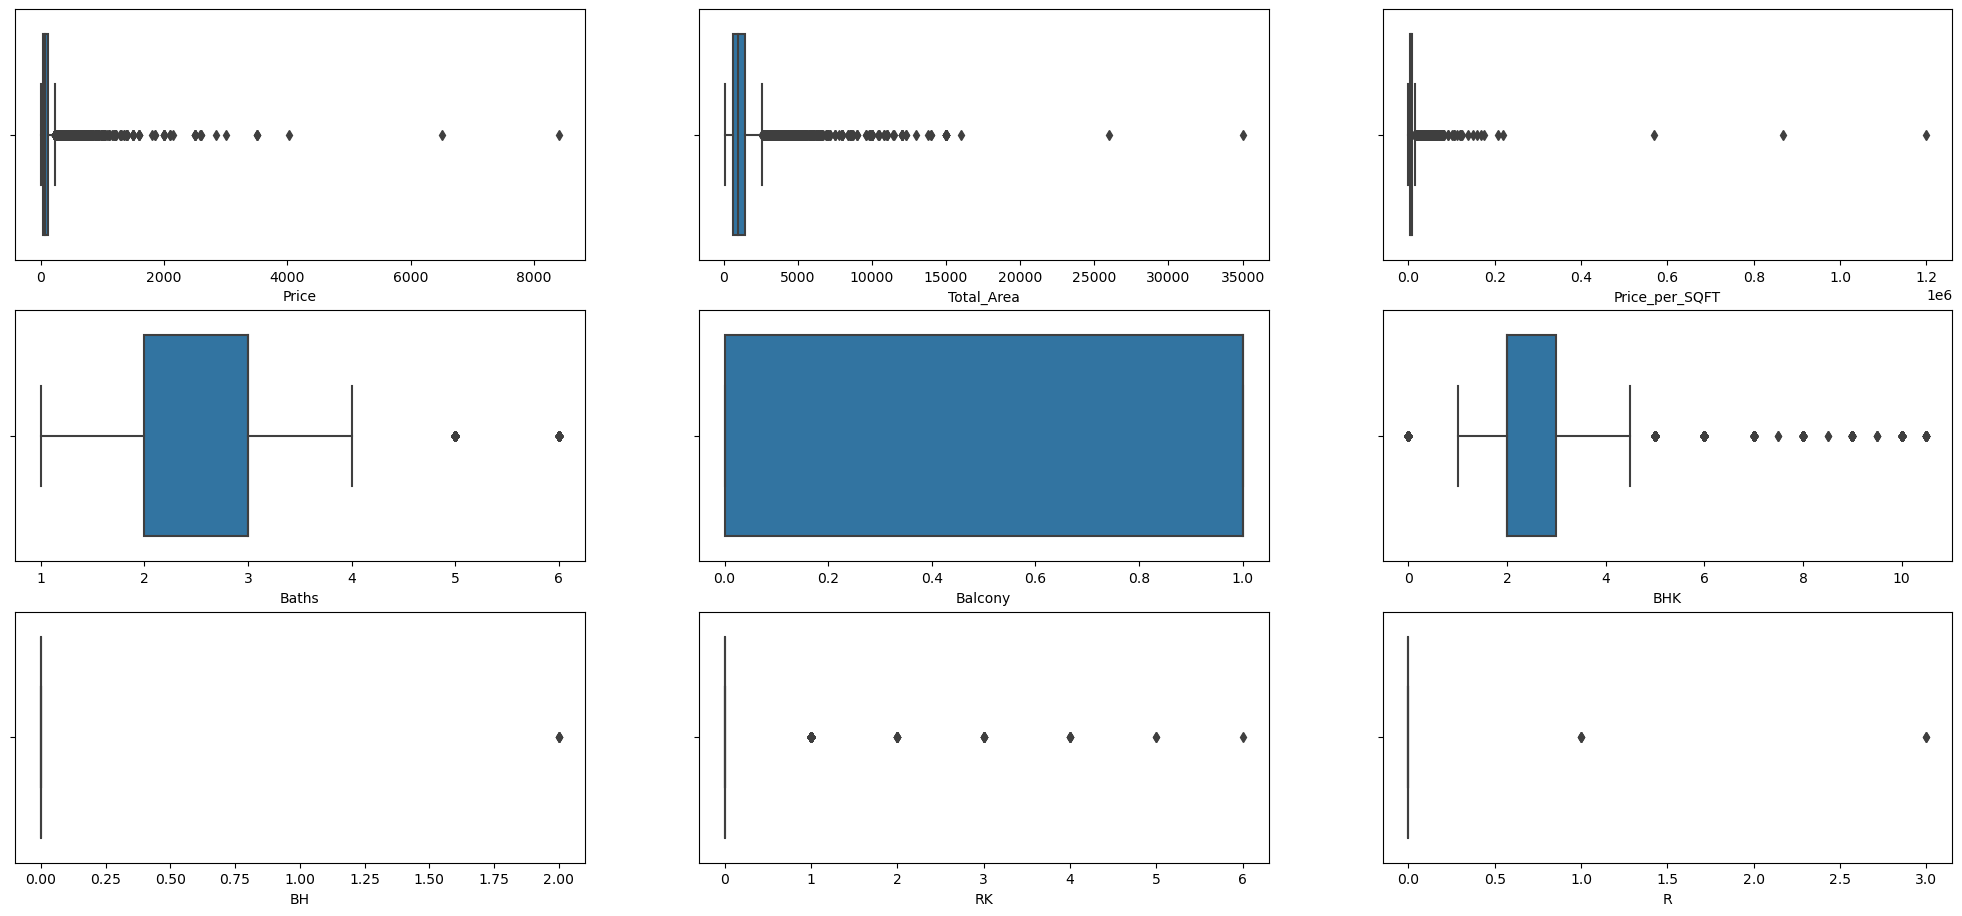

In [11]:
l = ['Price', 'Total_Area', 'Price_per_SQFT', 'Baths',
       'Balcony', 'BHK', 'BH', 'RK', 'R']
box_plot(df1,l)

# ***Building a function which will perform silillar above task for removal of outliers***

In [12]:
def out_rem(data,list_of_outlires_col):
    for column in list_of_outlires_col:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        uf = q3 + (1.5 * iqr)
        lf = q1 - (1.5 * iqr)
        
        # Getting IQR data
        print("Q1 =", q1,"| Q3 =",q3,"| IQR = ",iqr)
        print("Upper fence =",uf)
        print("Lower fence =",lf)
        
        # Limiting Data within IQR
        df_new = data[(data[column]<uf) & (data[column]>lf)]
        print("Nos of Records Deleted =",data.shape[0]-df_new.shape[0])
        print("% of Records Deleted =",round((data.shape[0]-df_new.shape[0])/data.shape[0]*100,2),'\n')
        data = df_new
        
    return data

In [13]:
li = ['Price_per_SQFT','Price','Total_Area','BHK']
df2 = out_rem(df1,li)
df2

Q1 = 4444.44 | Q3 = 9174.31 | IQR =  4729.87
Upper fence = 16269.115
Lower fence = -2650.3650000000007
Nos of Records Deleted = 1363
% of Records Deleted = 9.38 

Q1 = 35.0 | Q3 = 95.0 | IQR =  60.0
Upper fence = 185.0
Lower fence = -55.0
Nos of Records Deleted = 1074
% of Records Deleted = 8.16 

Q1 = 650.0 | Q3 = 1267.0 | IQR =  617.0
Upper fence = 2192.5
Lower fence = -275.5
Nos of Records Deleted = 820
% of Records Deleted = 6.78 

Q1 = 1.0 | Q3 = 3.0 | IQR =  2.0
Upper fence = 6.0
Lower fence = -2.0
Nos of Records Deleted = 188
% of Records Deleted = 1.67 



,Type,Price,State,Total_Area,Price_per_SQFT,Baths,Balcony,BHK,BH,RK,R
2,Flat,100.00,Chennai,1320,7575.76,3,0,3.0,0.0,0.0,0.0
4,Flat,48.00,Chennai,960,5000.00,3,1,2.0,0.0,0.0,0.0
5,Flat,40.00,Chennai,940,4255.32,3,0,2.0,0.0,0.0,0.0
6,Flat,60.00,Chennai,880,6818.18,3,1,2.0,0.0,0.0,0.0
7,Independent House,72.35,Chennai,1700,4255.88,3,1,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14523,Flat,40.00,New Delhi,1053,3798.67,3,1,2.0,0.0,0.0,0.0
14524,Independent House,14.00,New Delhi,472,2966.10,2,1,1.0,0.0,0.0,0.0
14525,Flat,30.00,New Delhi,378,7936.51,1,1,1.0,0.0,0.0,0.0
14526,Flat,60.00,New Delhi,700,8571.43,2,1,3.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

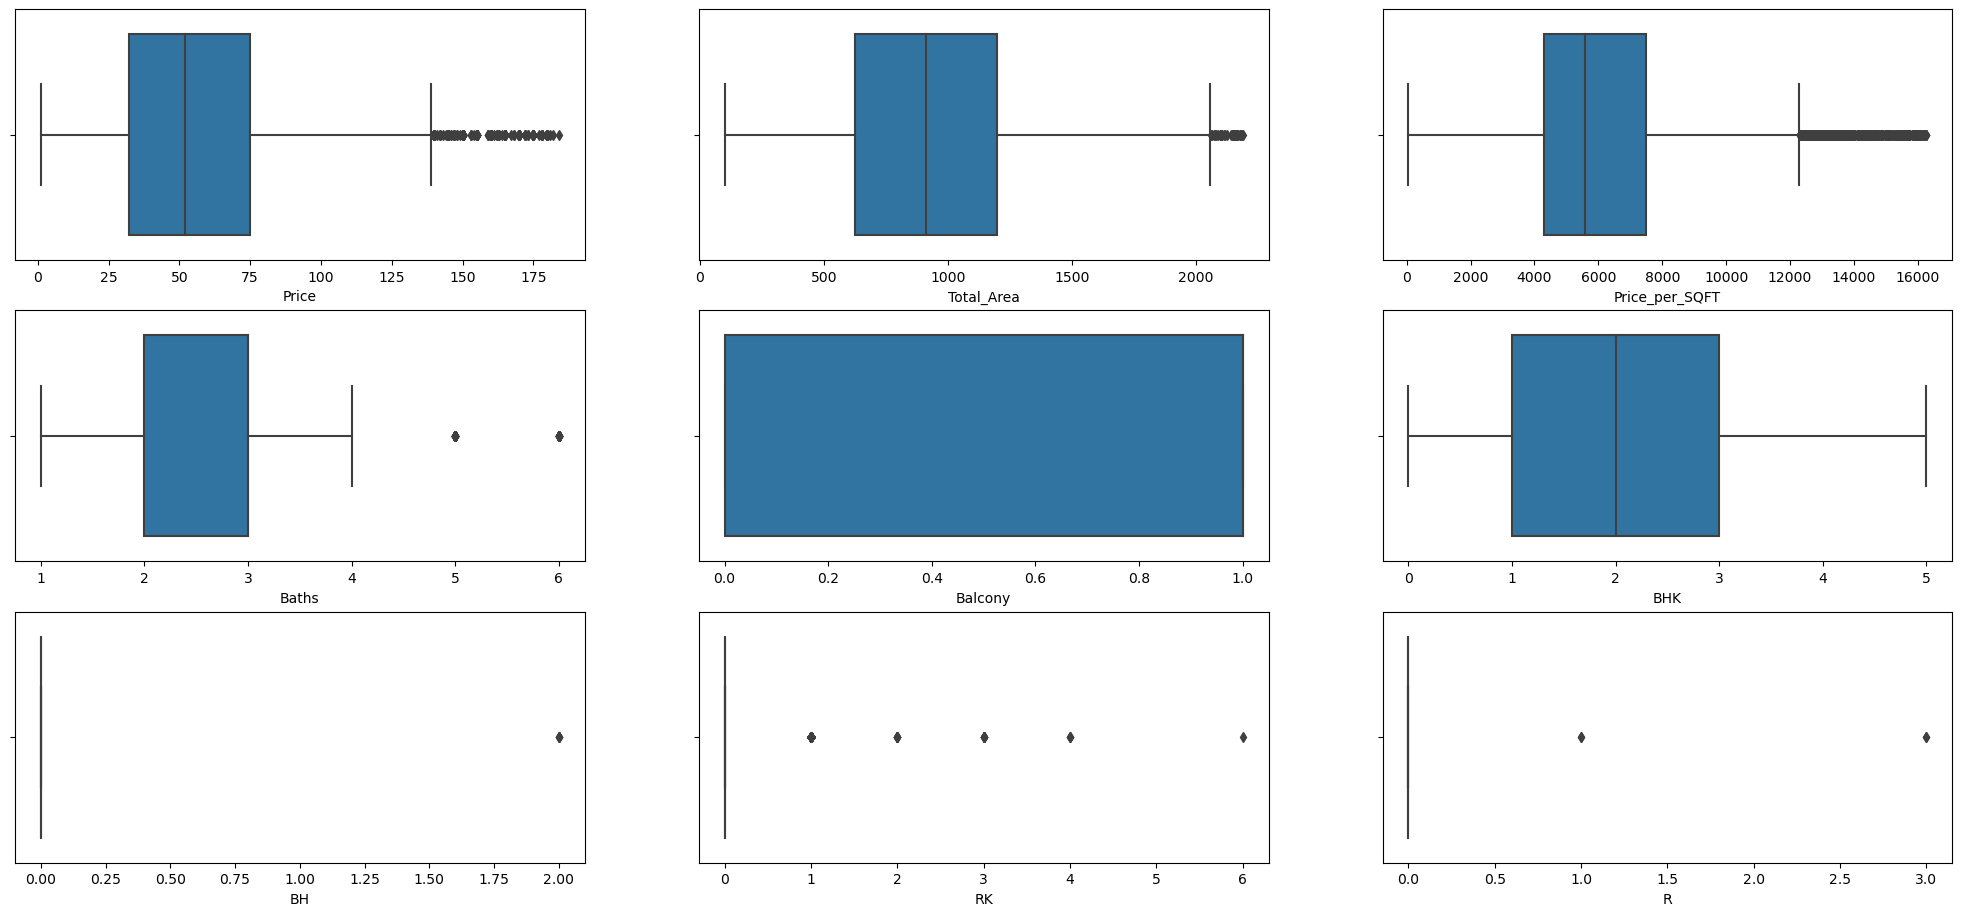

In [14]:
l = ['Price', 'Total_Area', 'Price_per_SQFT', 'Baths',
       'Balcony', 'BHK', 'BH', 'RK', 'R']
box_plot(df2,l)

In [15]:
df2.rename(columns = ({'State':'City'}), inplace = True)

# Model Training

In [16]:
d1 = pd.get_dummies(df2['City'], drop_first = True )
d2 = pd.get_dummies(df2['Type'], drop_first = True)
df3 = pd.concat([df2.drop(['Type','City'],axis = 1),d1,d2],axis = 1)
df3.drop('Price_per_SQFT',axis = 1,inplace= True)
x = df3.drop('Price',axis = 1)
y = df3['Price']

df3.head(3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Price,Total_Area,Baths,Balcony,BHK,BH,RK,R,Chennai,Hyderabad,Kolkata,Mumbai,New Delhi,Pune,Independent House,Shop Flat,Studio Flat,Studio Independent,Villa
2,100.0,1320,3,0,3.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0
4,48.0,960,3,1,2.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0
5,40.0,940,3,0,2.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.2)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(X_train,Y_train)

LinearRegression()

In [20]:
model.score(X_test,Y_test),model.score(X_train,Y_train)

(0.48736452357455906, 0.5093449758662008)

# Cross Validation

In [21]:
from sklearn.model_selection import ShuffleSplit # To create simillar random folds 
from sklearn.model_selection import cross_val_score
c = ShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state= 0)
cross_val_score(LinearRegression(),x,y , cv = c)

array([0.49735388, 0.48105616, 0.47136282, 0.52981952, 0.48681691,
       0.48706704, 0.49537018, 0.50891738, 0.48754617, 0.50772056])

# Hyperparameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV

# from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
def find_best_model(input_x,output_y):
    models = {
        'LinearRegression':{'model': LinearRegression(), 'param':{}},
        
        'Lasso':{'model':Lasso(), 'param':{'alpha':[5,10,20,30,40,50],'selection':['random','cyclic']}},
        
        'RandomForestRegressor':{'model':RandomForestRegressor(), 'param':{'criterion':['mse','friedman_mse']}},
        
#         'decision_tree':{'model':DecisionTreeRegressor(), 'param':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}}
    }
    
    score = []
    c = ShuffleSplit(n_splits = 6 , test_size = 0.2 , random_state= 0)
    for i,j in models.items():
        gsr = GridSearchCV(j['model'],j['param'],cv = c , return_train_score=False)
        gsr.fit(input_x,output_y)
        score.append({
            'model':i,
            'best_score':gsr.best_score_,
            'best_paramaters':gsr.best_params_
        })
    
    # Saving Scores into DataFrame
    score_details = pd.DataFrame(score,columns = ['model','best_score','best_paramaters'])
    return score_details

In [23]:
import warnings
warnings.filterwarnings('ignore')
find_best_model(x,y)

<IPython.core.display.Javascript object>

,model,best_score,best_paramaters
0,LinearRegression,0.492246,{}
1,Lasso,0.441621,"{'alpha': 50, 'selection': 'random'}"
2,RandomForestRegressor,0.455729,{'criterion': 'friedman_mse'}


# Lets Check Outliers Again

In [24]:
l = ['Price', 'Total_Area','Baths',
       'Balcony', 'BHK', 'BH', 'RK', 'R']
out_check(df2,l)

Price         4.430208
Total_Area    0.541370
Baths         0.902283
Balcony       0.000000
BHK           0.000000
BH            0.036091
RK            5.152035
R             0.036091
dtype: float64

In [25]:
ln = ['Price_per_SQFT','Price','Total_Area','RK']
df4 = out_rem(df2,li)
df4.shape

Q1 = 4312.35 | Q3 = 7500.0 | IQR =  3187.6499999999996
Upper fence = 12281.474999999999
Lower fence = -469.1249999999991
Nos of Records Deleted = 508
% of Records Deleted = 4.58 

Q1 = 32.0 | Q3 = 75.0 | IQR =  43.0
Upper fence = 139.5
Lower fence = -32.5
Nos of Records Deleted = 345
% of Records Deleted = 3.26 

Q1 = 629.0 | Q3 = 1200.0 | IQR =  571.0
Upper fence = 2056.5
Lower fence = -227.5
Nos of Records Deleted = 38
% of Records Deleted = 0.37 

Q1 = 1.0 | Q3 = 2.0 | IQR =  1.0
Upper fence = 3.5
Lower fence = -0.5
Nos of Records Deleted = 394
% of Records Deleted = 3.87 



(9798, 11)

In [26]:
l = ['Price', 'Total_Area','Baths',
       'Balcony', 'BHK', 'BH', 'RK', 'R']
out_check(df4,l)

Price         0.581751
Total_Area    0.622576
Baths         0.836905
Balcony       0.000000
BHK           0.000000
BH            0.040825
RK            5.337824
R             0.040825
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

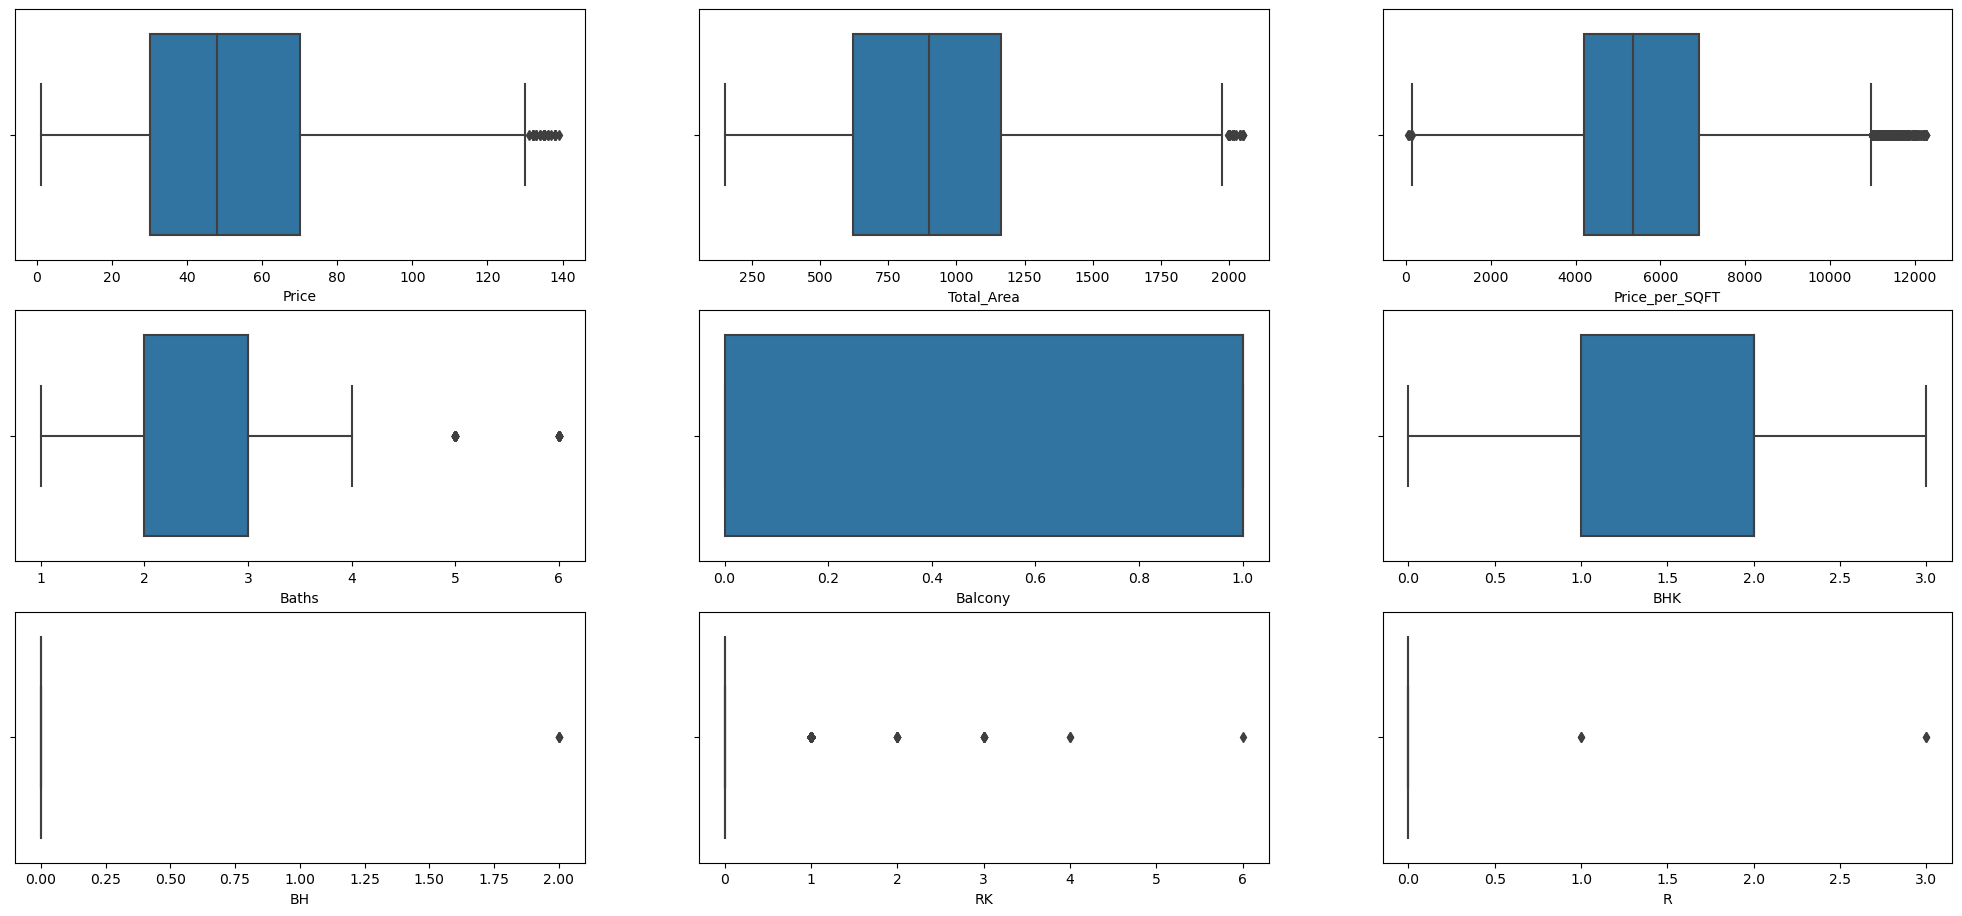

In [27]:
l = ['Price', 'Total_Area', 'Price_per_SQFT', 'Baths',
       'Balcony', 'BHK', 'BH', 'RK', 'R']
box_plot(df4,l)

In [28]:
df4.head(1)

,Type,Price,City,Total_Area,Price_per_SQFT,Baths,Balcony,BHK,BH,RK,R
2,Flat,100.0,Chennai,1320,7575.76,3,0,3.0,0.0,0.0,0.0


In [29]:
d1 = pd.get_dummies(df4['City'], drop_first = True )
d2 = pd.get_dummies(df4['Type'], drop_first = True)
df5 = pd.concat([df4.drop(['Type','City'],axis = 1),d1,d2],axis = 1)
df5.drop('Price_per_SQFT',axis = 1,inplace= True)
x = df5.drop('Price',axis = 1)
y = df5['Price']

df5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Price,Total_Area,Baths,Balcony,BHK,BH,RK,R,Chennai,Hyderabad,Kolkata,Mumbai,New Delhi,Pune,Independent House,Studio Flat,Studio Independent,Villa
2,100.00,1320,3,0,3.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0
4,48.00,960,3,1,2.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0
5,40.00,940,3,0,2.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0
6,60.00,880,3,1,2.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0
7,72.35,1700,3,1,3.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14521,9.00,200,1,0,1.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0
14523,40.00,1053,3,1,2.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0
14524,14.00,472,2,1,1.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0
14525,30.00,378,1,1,1.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0


In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.2)

model.fit(X_train,Y_train)

LinearRegression()

In [31]:
model.score(X_test,Y_test),model.score(X_train,Y_train)

(0.5394625894014944, 0.537019902975096)

# Again Cross validation

In [32]:
from sklearn.model_selection import ShuffleSplit # To create simillar random folds 
from sklearn.model_selection import cross_val_score
c = ShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state= 0)
cross_val_score(LinearRegression(),x,y , cv = c)

array([0.51376442, 0.52819598, 0.5321823 , 0.54027211, 0.52417626,
       0.52963404, 0.53263473, 0.54437431, 0.54497499, 0.53807809])

# Again Outliers removal

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

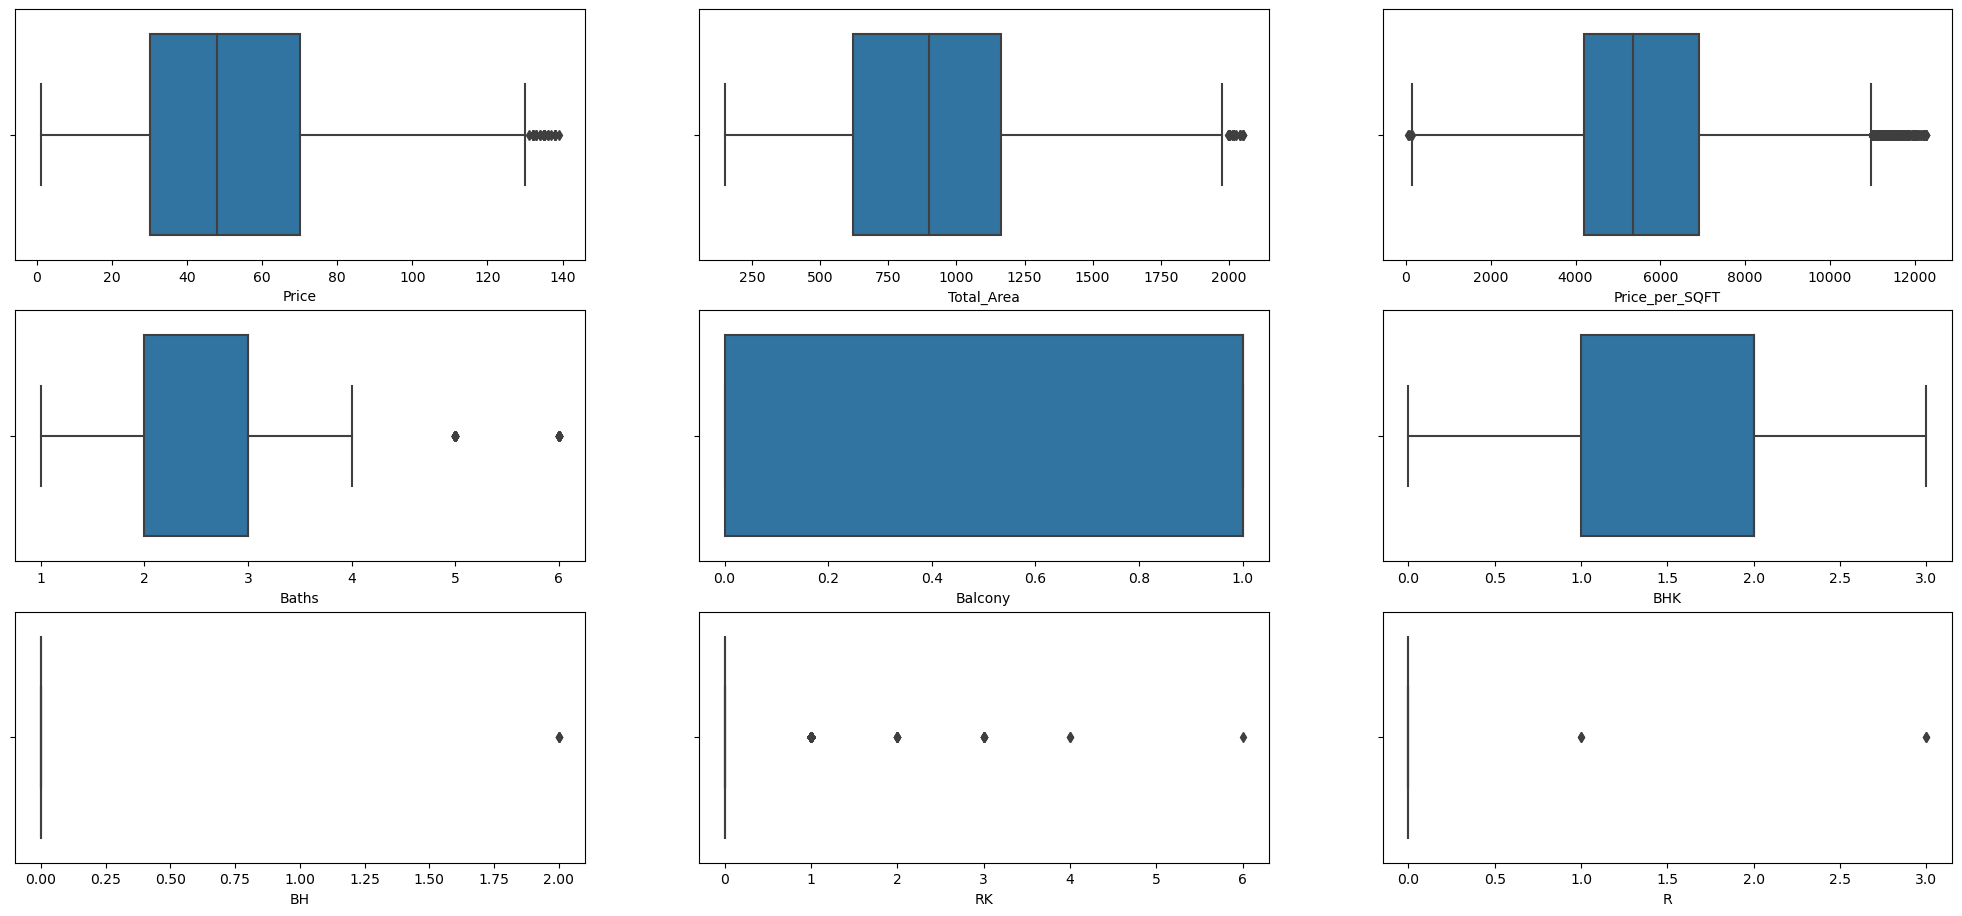

In [33]:
box_plot(df4,l)

In [34]:
out_check(df4,l)

Price             0.581751
Total_Area        0.622576
Price_per_SQFT    2.398449
Baths             0.836905
Balcony           0.000000
BHK               0.000000
BH                0.040825
RK                5.337824
R                 0.040825
dtype: float64

In [35]:
ln = ['Price_per_SQFT','Price','Total_Area','RK']
df6 = out_rem(df4,li)
df6

Q1 = 4210.53 | Q3 = 6923.08 | IQR =  2712.55
Upper fence = 10991.905
Lower fence = 141.70499999999947
Nos of Records Deleted = 235
% of Records Deleted = 2.4 

Q1 = 30.0 | Q3 = 69.0 | IQR =  39.0
Upper fence = 127.5
Lower fence = -28.5
Nos of Records Deleted = 116
% of Records Deleted = 1.21 

Q1 = 620.0 | Q3 = 1159.0 | IQR =  539.0
Upper fence = 1967.5
Lower fence = -188.5
Nos of Records Deleted = 59
% of Records Deleted = 0.62 

Q1 = 1.0 | Q3 = 2.0 | IQR =  1.0
Upper fence = 3.5
Lower fence = -0.5
Nos of Records Deleted = 0
% of Records Deleted = 0.0 



,Type,Price,City,Total_Area,Price_per_SQFT,Baths,Balcony,BHK,BH,RK,R
2,Flat,100.00,Chennai,1320,7575.76,3,0,3.0,0.0,0.0,0.0
4,Flat,48.00,Chennai,960,5000.00,3,1,2.0,0.0,0.0,0.0
5,Flat,40.00,Chennai,940,4255.32,3,0,2.0,0.0,0.0,0.0
6,Flat,60.00,Chennai,880,6818.18,3,1,2.0,0.0,0.0,0.0
7,Independent House,72.35,Chennai,1700,4255.88,3,1,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14521,Flat,9.00,New Delhi,200,4500.00,1,0,1.0,0.0,0.0,0.0
14523,Flat,40.00,New Delhi,1053,3798.67,3,1,2.0,0.0,0.0,0.0
14524,Independent House,14.00,New Delhi,472,2966.10,2,1,1.0,0.0,0.0,0.0
14525,Flat,30.00,New Delhi,378,7936.51,1,1,1.0,0.0,0.0,0.0


In [36]:
d1 = pd.get_dummies(df6['City'], drop_first = True )
d2 = pd.get_dummies(df6['Type'], drop_first = True)
df7 = pd.concat([df6.drop(['Type','City'],axis = 1),d1,d2],axis = 1)
df7.drop('Price_per_SQFT',axis = 1,inplace= True)
x = df7.drop('Price',axis = 1)
y = df7['Price']

X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.2)

model.fit(X_train,Y_train)

model.score(X_test,Y_test),model.score(X_train,Y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0.5435728243938727, 0.5747870119335424)

In [37]:
x.shape

(9388, 17)

In [38]:
df6

,Type,Price,City,Total_Area,Price_per_SQFT,Baths,Balcony,BHK,BH,RK,R
2,Flat,100.00,Chennai,1320,7575.76,3,0,3.0,0.0,0.0,0.0
4,Flat,48.00,Chennai,960,5000.00,3,1,2.0,0.0,0.0,0.0
5,Flat,40.00,Chennai,940,4255.32,3,0,2.0,0.0,0.0,0.0
6,Flat,60.00,Chennai,880,6818.18,3,1,2.0,0.0,0.0,0.0
7,Independent House,72.35,Chennai,1700,4255.88,3,1,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14521,Flat,9.00,New Delhi,200,4500.00,1,0,1.0,0.0,0.0,0.0
14523,Flat,40.00,New Delhi,1053,3798.67,3,1,2.0,0.0,0.0,0.0
14524,Independent House,14.00,New Delhi,472,2966.10,2,1,1.0,0.0,0.0,0.0
14525,Flat,30.00,New Delhi,378,7936.51,1,1,1.0,0.0,0.0,0.0


In [39]:
from sklearn.model_selection import ShuffleSplit # To create simillar random folds 
from sklearn.model_selection import cross_val_score
c = ShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state= 0)
cross_val_score(LinearRegression(),x,y , cv = c)

array([0.57429296, 0.5813252 , 0.5422064 , 0.57557989, 0.55389395,
       0.56738461, 0.53386262, 0.58673515, 0.5531767 , 0.57684258])

In [40]:
def pipeline(data):
    l = ['Price', 'Total_Area', 'Price_per_SQFT', 'Baths',
       'Balcony', 'BHK', 'BH', 'RK', 'R']
    # Plotting
    print(box_plot(data,l))

    # % Checking
    print(out_check(data,l))

    # Removing
    ln = ['Price_per_SQFT','Price','Total_Area','RK']
    new_data = out_rem(data,li)
    print("\n Shape of data after removing Outliers \n",new_data.shape)

    # Converting into numerical
    d1 = pd.get_dummies(new_data['City'], drop_first = True )
    d2 = pd.get_dummies(new_data['Type'], drop_first = True)
    model_data = pd.concat([new_data.drop(['Type','City'],axis = 1),d1,d2],axis = 1)
    model_data.drop('Price_per_SQFT',axis = 1,inplace= True)
    x = model_data.drop('Price',axis = 1)
    y = model_data['Price']

    # Spliting
    X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.2)

    # Training
    model.fit(X_train,Y_train)

    # Score Checking
    print("Test Score :",model.score(X_test,Y_test),"Train Score :",model.score(X_train,Y_train))

    # Cross Validating
    from sklearn.model_selection import ShuffleSplit # To create simillar random folds 
    from sklearn.model_selection import cross_val_score
    c = ShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state= 0)
    print(cross_val_score(LinearRegression(),x,y , cv = c))
    
    return find_best_model(x,y)
    return new_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Price             0.681721
Total_Area        0.053259
Price_per_SQFT    1.235620
Baths             0.703025
Balcony           0.000000
BHK               0.000000
BH                0.042608
RK                5.443119
R                 0.042608
dtype: float64

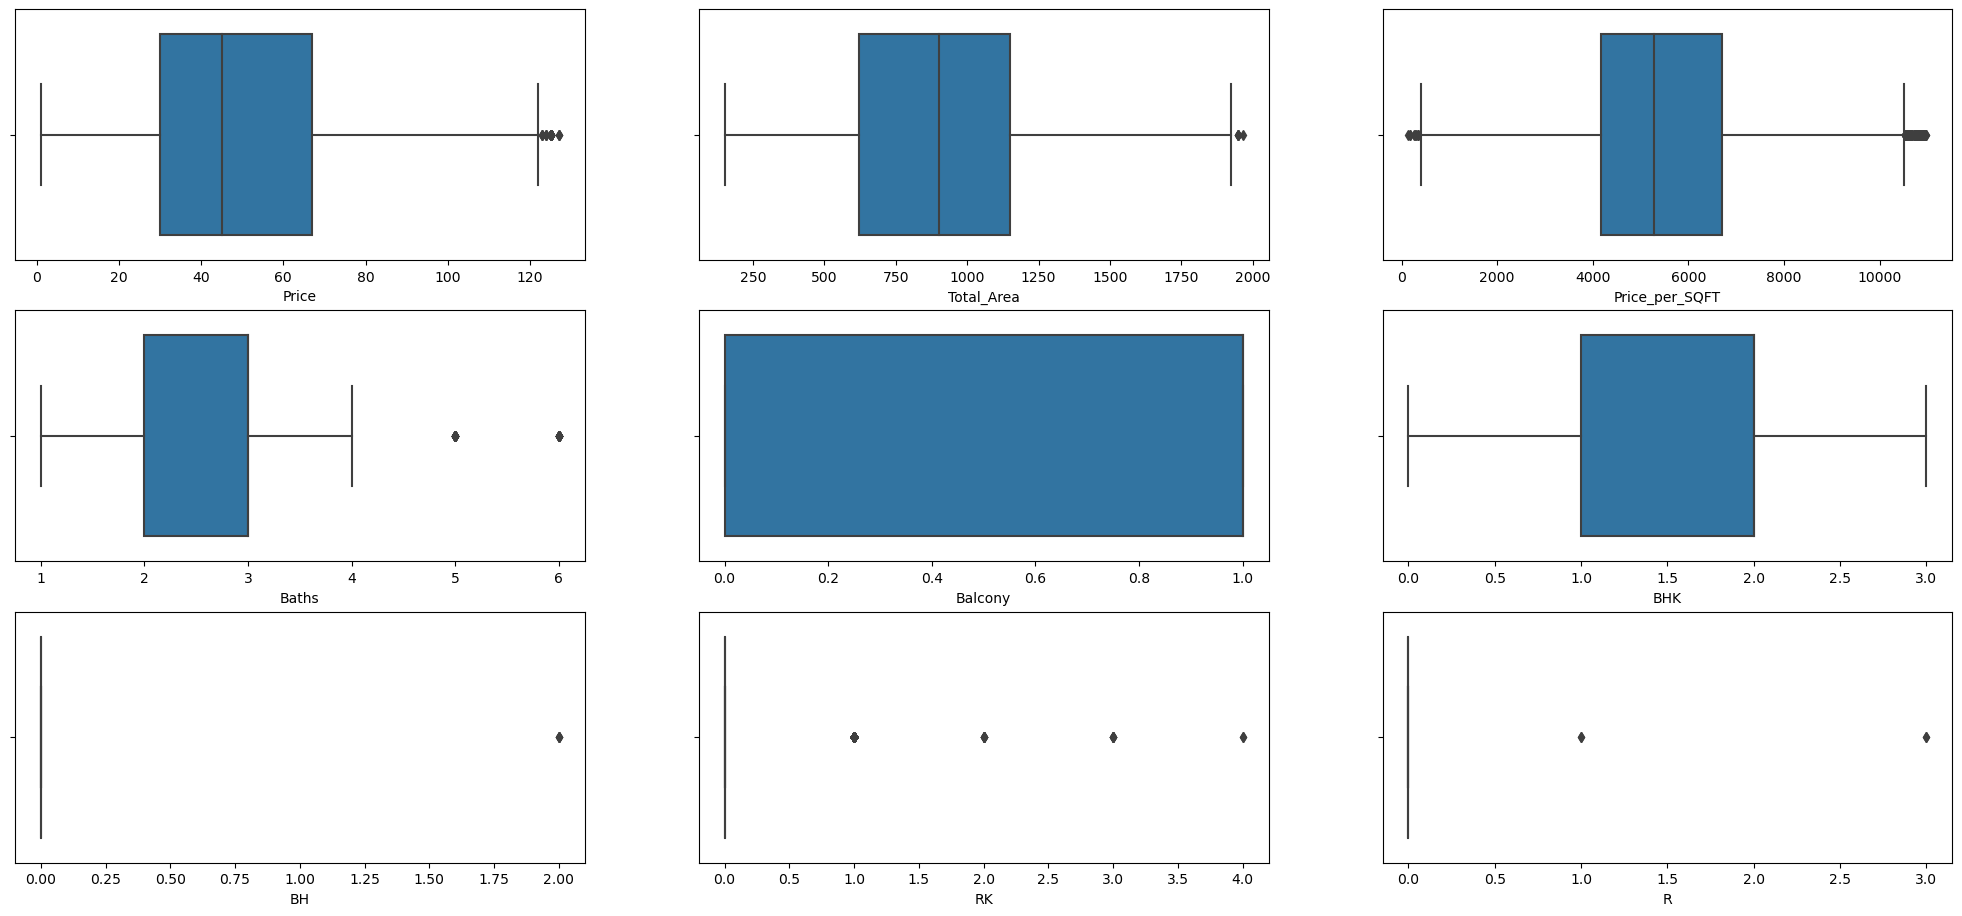

In [41]:
l = ['Price', 'Total_Area', 'Price_per_SQFT', 'Baths',
       'Balcony', 'BHK', 'BH', 'RK', 'R']
# Plotting
box_plot(df6,l)

out_check(df6,l)

In [42]:
ln = ['Price_per_SQFT','Price','Total_Area','RK']
df8 = out_rem(df6,li)
print("\nShape of data after removing Outliers \n",df6.shape,df8.shape)

Q1 = 4166.67 | Q3 = 6708.7275 | IQR =  2542.0575
Upper fence = 10521.81375
Lower fence = 353.58375000000024
Nos of Records Deleted = 116
% of Records Deleted = 1.24 

Q1 = 30.0 | Q3 = 66.0 | IQR =  36.0
Upper fence = 120.0
Lower fence = -24.0
Nos of Records Deleted = 137
% of Records Deleted = 1.48 

Q1 = 620.0 | Q3 = 1146.0 | IQR =  526.0
Upper fence = 1935.0
Lower fence = -169.0
Nos of Records Deleted = 4
% of Records Deleted = 0.04 

Q1 = 1.0 | Q3 = 2.0 | IQR =  1.0
Upper fence = 3.5
Lower fence = -0.5
Nos of Records Deleted = 0
% of Records Deleted = 0.0 


Shape of data after removing Outliers 
 (9388, 11) (9131, 11)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Price             0.032855
Total_Area        0.000000
Price_per_SQFT    0.514730
Baths             0.700909
Balcony           0.000000
BHK               0.000000
BH                0.043807
RK                5.508707
R                 0.032855
dtype: float64

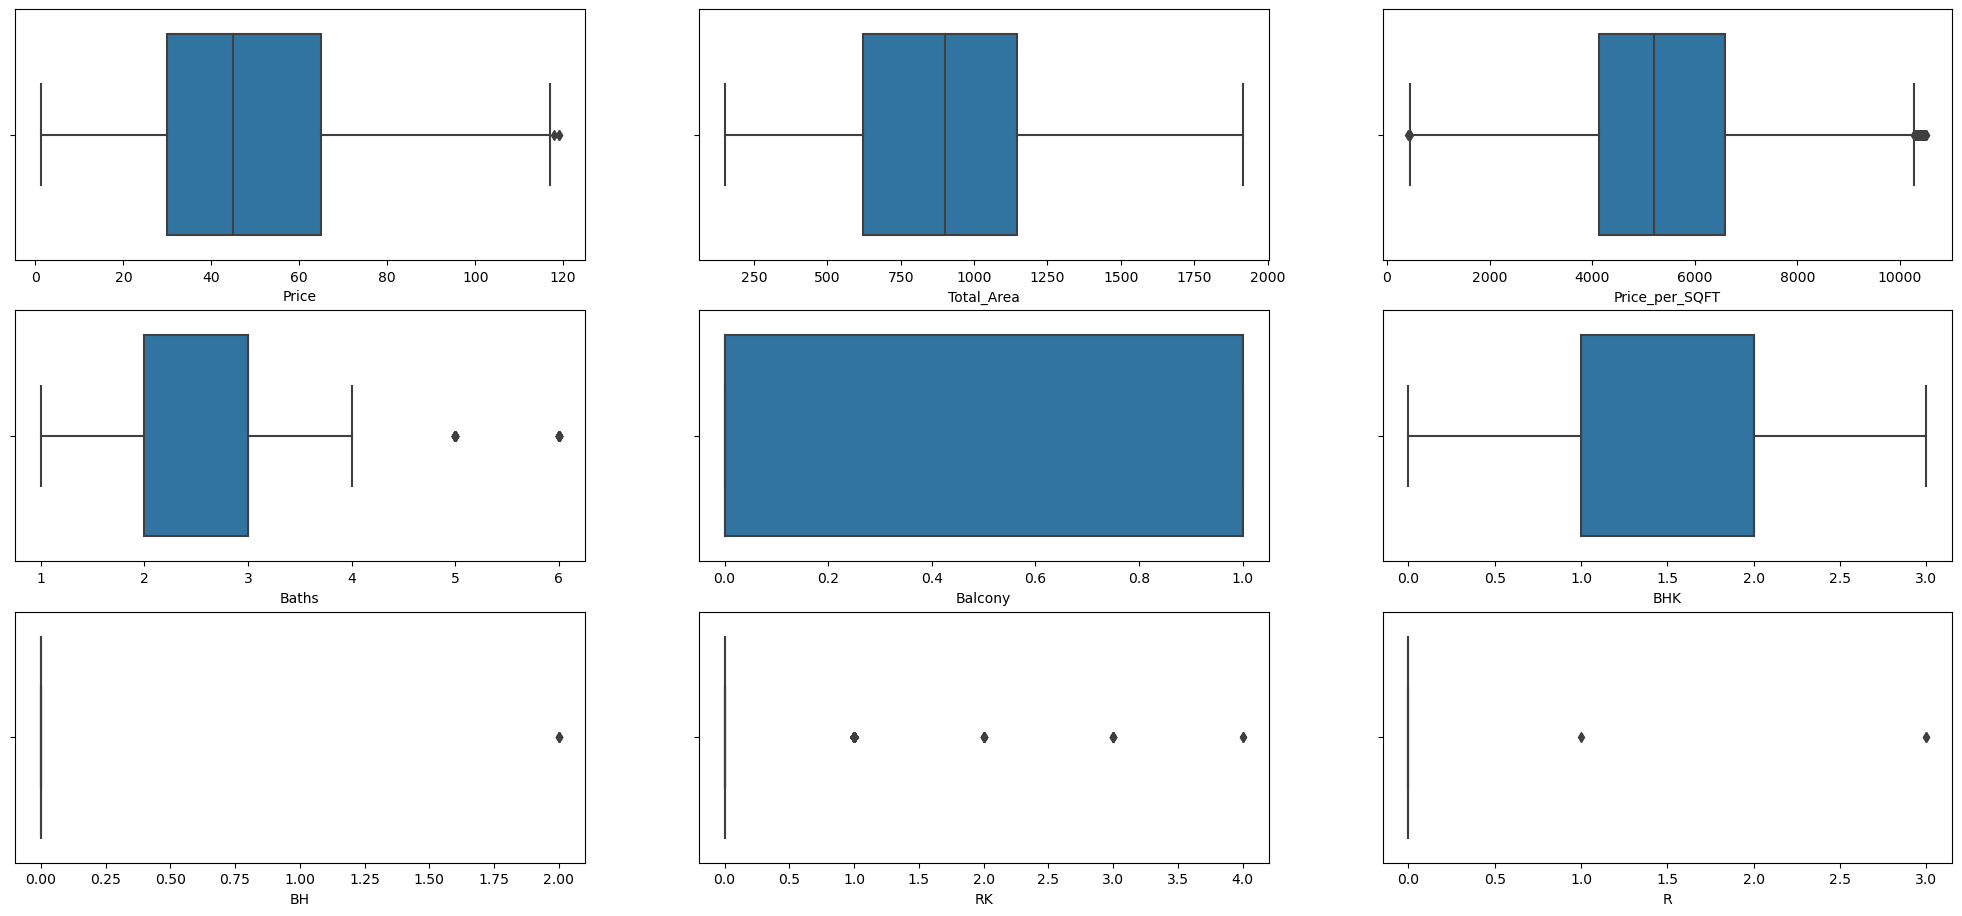

In [43]:
# Plotting
box_plot(df8,l)

# % Checking
out_check(df8,l)

In [44]:
# Converting into numerical
d1 = pd.get_dummies(df8['City'], drop_first = True )
d2 = pd.get_dummies(df8['Type'], drop_first = True)
df9 = pd.concat([df8.drop(['Type','City'],axis = 1),d1,d2],axis = 1)
df9.drop('Price_per_SQFT',axis = 1,inplace= True)
x = df9.drop('Price',axis = 1)
y = df9['Price']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
# Spliting
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.2)

# Training
model.fit(X_train,Y_train)

# Score Checking
print("Test Score :",model.score(X_test,Y_test),"Train Score :",model.score(X_train,Y_train))

Test Score : 0.5374831154662654 Train Score : 0.583389741588877


In [46]:
# Cross Validating
from sklearn.model_selection import ShuffleSplit # To create simillar random folds 
from sklearn.model_selection import cross_val_score
c = ShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state= 0)
print(cross_val_score(LinearRegression(),x,y , cv = c))

[0.58309087 0.58640079 0.58538799 0.5623998  0.56951766 0.58381633
 0.56166765 0.55650915 0.53392853 0.5653803 ]


In [47]:
find_best_model(x,y)

<IPython.core.display.Javascript object>

,model,best_score,best_paramaters
0,LinearRegression,0.578436,{}
1,Lasso,0.550185,"{'alpha': 5, 'selection': 'random'}"
2,RandomForestRegressor,0.533424,{'criterion': 'friedman_mse'}


# Giving average score of 57%
**So we will consider df7 as our dataset**
# Again

l = ['Price', 'Total_Area', 'Price_per_SQFT', 'Baths',
       'Balcony', 'BHK', 'BH', 'RK', 'R']
# Plotting
print(box_plot(df8,l))

# % Checking
print(out_check(df8,l))

# Removing
ln = ['Price_per_SQFT','Price','Total_Area','RK']
df10 = out_rem(df8,li)
print("\nShape of data after removing Outliers \n",df10.shape)

# Plotting
print("After Removing Outliers",box_plot(df10,l))
print("After Removing Outliers",out_check(df10,l))

# Converting into numerical
d1 = pd.get_dummies(df10['City'], drop_first = True )
d2 = pd.get_dummies(df10['Type'], drop_first = True)
df11 = pd.concat([df10.drop(['Type','City'],axis = 1),d1,d2],axis = 1)
df11.drop('Price_per_SQFT',axis = 1,inplace= True)
x = df11.drop('Price',axis = 1)
y = df11['Price']

# Spliting
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.2)

# Training
model.fit(X_train,Y_train)

# Score Checking
print("Test Score :",model.score(X_test,Y_test),"Train Score :",model.score(X_train,Y_train),"\n")

# Cross Validating
from sklearn.model_selection import ShuffleSplit # To create simillar random folds 
from sklearn.model_selection import cross_val_score
c = ShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state= 0)
print(cross_val_score(LinearRegression(),x,y , cv = c))
    


df66 = df6.drop(df6[df6['RK']!=0].index , axis = 0)
df66.drop(df6[df6['BH']!=0].index , axis = 0, inplace = True)
df66.drop(df6[df6['R']!=0].index , axis = 0, inplace = True)
df66.drop(['R'], axis = 1, inplace = True)
df66.drop(['BH'], axis = 1, inplace = True)
df66.drop(['RK'], axis = 1, inplace = True)

df6.shape[0] - df66.shape[0]

# Building Function for Price Prediction

In [89]:
d1 = pd.get_dummies(df6['City'] , drop_first = True)
d2 = pd.get_dummies(df6['Type'], drop_first = True)
df7 = pd.concat([df6.drop(['Type','City'],axis = 1),d1,d2],axis = 1)
df7.drop('Price_per_SQFT',axis = 1,inplace= True)
x = df7.drop('Price',axis = 1)
y = df7['Price']

x.rename(columns = {'Flat ':'Flat'},inplace = True)

X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.2)

model.fit(X_train,Y_train)

model.score(X_test,Y_test),model.score(X_train,Y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0.6057794578085884, 0.5590741982720238)

In [49]:
print(cross_val_score(LinearRegression(),x,y , cv = ShuffleSplit(n_splits = 6 , test_size = 0.2 , random_state= 0) ))

[0.57429296 0.5813252  0.5422064  0.57557989 0.55389395 0.56738461]


In [50]:
df7.head(3)

,Price,Total_Area,Baths,Balcony,BHK,BH,RK,R,Chennai,Hyderabad,Kolkata,Mumbai,New Delhi,Pune,Independent House,Studio Flat,Studio Independent,Villa
2,100.0,1320,3,0,3.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0
4,48.0,960,3,1,2.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0
5,40.0,940,3,0,2.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0


In [51]:
l = np.zeros(len(x.columns))
len(l),x.shape[1]

<IPython.core.display.Javascript object>

(17, 17)

In [52]:
x.columns

Index(['Total_Area', 'Baths', 'Balcony', 'BHK', 'BH', 'RK', 'R', 'Chennai',
       'Hyderabad', 'Kolkata', 'Mumbai', 'New Delhi', 'Pune',
       'Independent House', 'Studio Flat', 'Studio Independent', 'Villa '],
      dtype='object')

In [90]:
def predict_price(Total_Area,Baths,Balcony,BHK,BH,RK,R,City,Type):
    city_index = np.where(x.columns == City)[0][0] # This will return the index of entered City
    type_index = np.where(x.columns == Type)[0][0] # This will return the index of entered Type
    
    l = np.zeros(len(x.columns))  # Making list of length = input column length
    l[0] = Total_Area
    l[1] = Baths
    l[2] = Balcony
    l[3] = BHK
    l[4] = BH
    l[5] = RK
    l[6] = R
    if city_index >= 0:
        l[city_index] = 1
    if type_index >= 0:
        l[type_index] = 1
    
    return model.predict([l])[0]

In [96]:
# predict_price(Total_Area,Baths,Balcony,BHK,BH,RK,R,City,Type)
predict_price(2500,2,1,3,0,0,0,'Mumbai','Independent House')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

132.7346809078665

In [92]:
pr = model.predict(X_test)
pr[:10]

array([55.65966096, 27.39612098, 68.18050026, 28.53927517, 32.47698904,
       34.29324204, 41.13143866, 47.75791836, 41.64836261, 79.90036874])

In [93]:
Y_test.head(10)

12610    26.0
14380     3.8
6055     30.0
13847    20.0
12698    50.0
10301    20.0
14335    38.5
8733     35.0
8621     30.0
6192     95.0
Name: Price, dtype: float64

# Saving Model to export for production 

In [94]:
import pickle
with open('Real_Estate_Price_Prediction.pickle','wb') as v: # wb --> storing in Bytes
    pickle.dump(model,v)

# ***This file will only stores the Coefficient and Intercept data of the model***
**also we have to take the Column data according to its index**
* **Hence, we will store the columns data into a JSON file**

In [95]:
import json
columns = {'columns' :[i.lower() for i in x.columns]}
with open('Real_Estate_Input_data_details.json','w') as f:
    f.write(json.dumps(columns))